In [1]:
info = {
    "title": "Jack-O-Lantern",
    "author": "Alex Carney",
    "github_username": "alcarney",
    "stylo_version": "0.6.0",
    "dimensions": (1920, 1080)
}

In [2]:
from stylo.image import LayeredImage
from stylo.shape import Circle, Ellipse, Triangle, Rectangle
from stylo.color import FillColor
from stylo.domain.transform import translate, rotate

from math import pi, sqrt

In [3]:
orange = FillColor("ffaa00")
darker_orange = FillColor("dd9900")
black = FillColor("000000")
green = FillColor("00dd00")

In [4]:
def make_segment(size=0.8):
    return Ellipse(x=0, y=-0.15, a=sqrt(1/2), b=1, r=size, fill=True)

In [5]:
middle = make_segment()
middle_outline = make_segment(0.825)

left = make_segment() >> translate(-0.5, 0)
left_outline = make_segment(0.825) >> translate(-0.5, 0)

right = make_segment() >> translate(0.5, 0)
right_outline = make_segment(0.825) >> translate(0.5, 0)

In [6]:
left_eye = Triangle((0,0), (-0.25, -0.1), (-0.25, 0.1)) >> rotate(pi/8) >> translate(-0.35, 0) 
right_eye = Triangle((0, 0), (0.25, -0.1), (0.25, 0.1)) >> rotate(-pi/8) >> translate(0.35, 0)

nose = Triangle((0,0), (-0.15, -0.15), (0.15, -0.15))

In [7]:
cutouts = Circle(x=0, y=0.5, r=1, fill=True)
cutouts |= Rectangle(-0.3, -0.45, 0.15, 0.2)
cutouts |= Rectangle(0.2, -0.475, 0.15, 0.2)
cutouts |= Rectangle(-0.05, -0.7, 0.15, 0.2)

mouth = Ellipse(x=0, y=-.3, a=sqrt(2), b=1, r=0.4, fill=True) & ~cutouts

In [8]:
offset = 0.1
stem = Ellipse(x=(0 + offset), y=0.4, a=1, b=sqrt(8), r=0.2, fill=True) \
     & ~Circle(x=(0.25 + offset), y=0.6, r=0.35, fill=True)

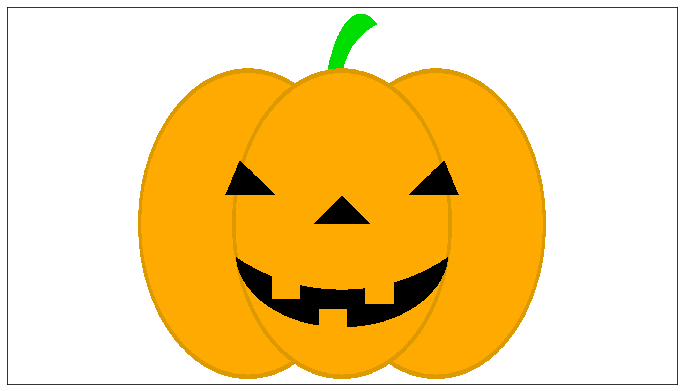

In [9]:
image = LayeredImage()

image.add_layer(stem, green)

image.add_layer(left_outline, darker_orange)
image.add_layer(right_outline, darker_orange)
image.add_layer(left, orange)
image.add_layer(right, orange)

image.add_layer(middle_outline, darker_orange)
image.add_layer(middle, orange)

image.add_layer(left_eye, black)
image.add_layer(right_eye, black)
image.add_layer(nose, black)

image.add_layer(mouth, black)

image(1920, 1080)